In [232]:
import torch
import torch.nn as nn
import torch.nn.init as init
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [233]:
nL = 20
cw = 10.
cb = 0.
n_inputs = 100
n_samples = 300
in_size = 1000

In [241]:
class Linear_NN(nn.Module):
    def __init__(self):
        super(Linear_NN, self).__init__()
        self.firstlayer = nn.Linear(in_features=in_size, out_features=nL)
        self.layer1 = nn.Linear(nL, nL)
        self.layer2 = nn.Linear(nL, nL)
        self.layer3 = nn.Linear(nL, nL)
        self.layer4 = nn.Linear(nL, nL)
        self.layer5 = nn.Linear(nL, nL)
        self.finallayer = nn.Linear(in_features=nL, out_features=1)
        
        # Initialize weights from a Gaussian distribution
        init.normal_(self.firstlayer.weight, mean=0.0, std=np.sqrt(cw/in_size))
        init.normal_(self.layer1.weight, mean=0.0, std=np.sqrt(cw/nL))
        init.normal_(self.layer2.weight, mean=0.0, std=np.sqrt(cw/nL))
        init.normal_(self.layer3.weight, mean=0.0, std=np.sqrt(cw/nL))
        init.normal_(self.layer4.weight, mean=0.0, std=np.sqrt(cw/nL))
        init.normal_(self.layer5.weight, mean=0.0, std=np.sqrt(cw/nL))
        init.normal_(self.finallayer.weight, mean=0.0, std=np.sqrt(cw/nL))
        
        # Initialize biases from a Gaussian distribution
        init.normal_(self.firstlayer.bias, mean=0.0, std=cb)
        init.normal_(self.layer1.bias, mean=0.0, std=cb)
        init.normal_(self.layer2.bias, mean=0.0, std=cb)
        init.normal_(self.layer3.bias, mean=0.0, std=cb)
        init.normal_(self.layer4.bias, mean=0.0, std=cb)
        init.normal_(self.layer5.bias, mean=0.0, std=cb)
        init.normal_(self.finallayer.bias, mean=0.0, std=cb)
        
    def forward(self, x):
        x = self.firstlayer(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        z3 = x
        x = self.layer4(x)
        z4 = x
        x = self.layer5(x)
        x = self.finallayer(x)
        return x, z3, z4

In [242]:
x = torch.randn(n_inputs,in_size)

In [243]:
# g3 = torch.tensor([[sum(z3[i,j]*z3[k,j] for j in range(20)) for i in range(10)] for k in range(10)])/nL 
# this was just used as a double check to check that the definition of g3 below is ok

In [244]:
ratios = []
for _ in range(n_samples):
    model = Linear_NN()
    out = model(x)
    z3 = out[1].detach()
    z4 = out[2].detach()
    g3 = torch.mean(torch.diagonal(torch.outer(z3.ravel(),z3.ravel()).view(n_inputs,nL,n_inputs,nL),dim1 = 1, dim2 = 3),2)
    g4 = torch.mean(torch.diagonal(torch.outer(z4.ravel(),z4.ravel()).view(n_inputs,nL,n_inputs,nL),dim1 = 1, dim2 = 3),2)
    #g31 = torch.tensor([[sum(z3[i,j]*z3[k,j] for j in range(nL)) for i in range(n_inputs)] for k in range(n_inputs)])/nL 
    #g41 = torch.tensor([[sum(z4[i,j]*z4[k,j] for j in range(nL)) for i in range(n_inputs)] for k in range(n_inputs)])/nL 
    ratios.append(torch.mean((g4/g3).ravel()).detach())

In [245]:
def gauss(x, mean, std):
    norm = np.sqrt(2*np.pi)*std
    exponent = ((x - mean)**2)/(2*std**2)
    return np.exp(-exponent)/norm

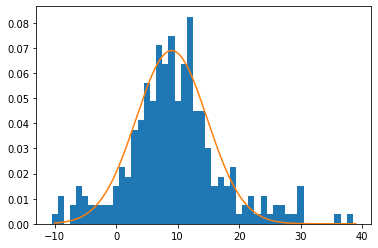

In [246]:
hist = plt.hist(np.array(ratios), bins = np.arange(-10,40,1),align='left' ,density=True)
x_data = np.linspace(min(hist[1]),max(hist[1]),1000)
[fit_mean, fit_std], fit_cov = curve_fit(gauss, hist[1][:-1],hist[0])
y_data = gauss(x_data,fit_mean,fit_std)
plt.plot(x_data,y_data)

We see that the mean is consistent with the value of "scale"

In [247]:
print('The measured ratio is', fit_mean,'+-',fit_std)

The measured ratio is 9.029251865968478 +- 5.788102450974151
